In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "0.8_Data.csv"
latticeSizes = [20, 40, 60]
global_CSVData = pd.read_csv(file, sep=',', index_col=0)
Sixty_CSVData = pd.read_csv("0.8_60_Data.csv", sep=',', index_col=0)
global_CSVData = pd.concat([global_CSVData, Sixty_CSVData])

C:\Users\Robert Clampett\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


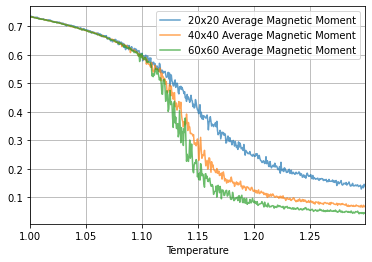

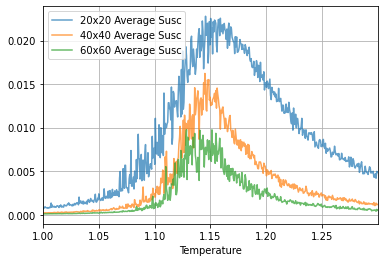

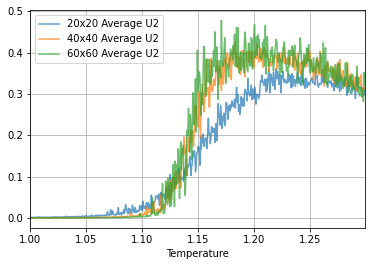

In [12]:
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

for i in latticeSizes:
    global_CSVData.plot(y = "{}x{} Average Magnetic Moment".format(i,i), ax=ax, grid=True, alpha=0.7)
    global_CSVData.plot(y = "{}x{} Average Susc".format(i,i), ax=ax2, grid=True, alpha=0.7)
    global_CSVData.plot(y = "{}x{} Average U2".format(i,i), ax=ax3, grid=True, alpha=0.7)